In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
# Läs in datasetet
df = pd.read_csv('age_salary.csv')

# Visa de första raderna av datasetet
print(df.head())

# Kontrollera för saknade värden
print(df.isnull().sum())

# EDA - grundläggande statistik
print(df.describe())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


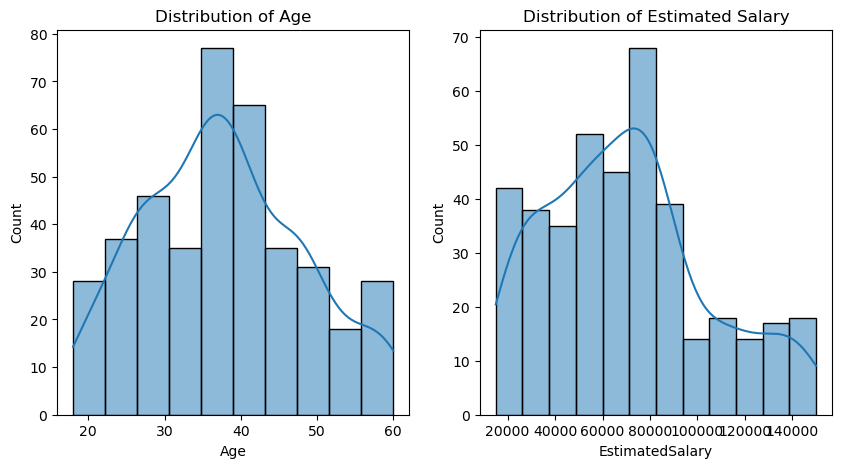

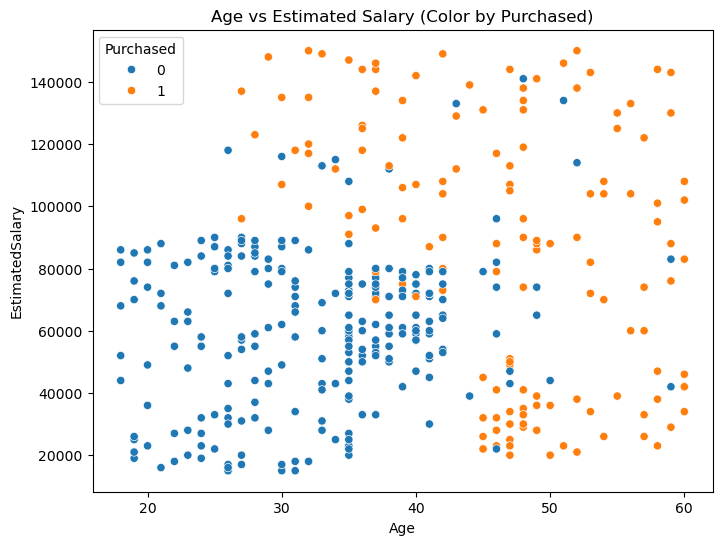

c:\Apps\conda\envs\AIkurs_statistik\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


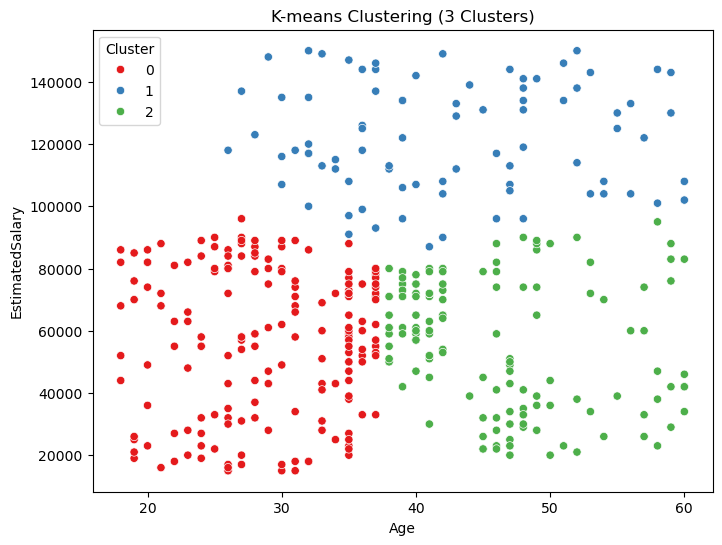

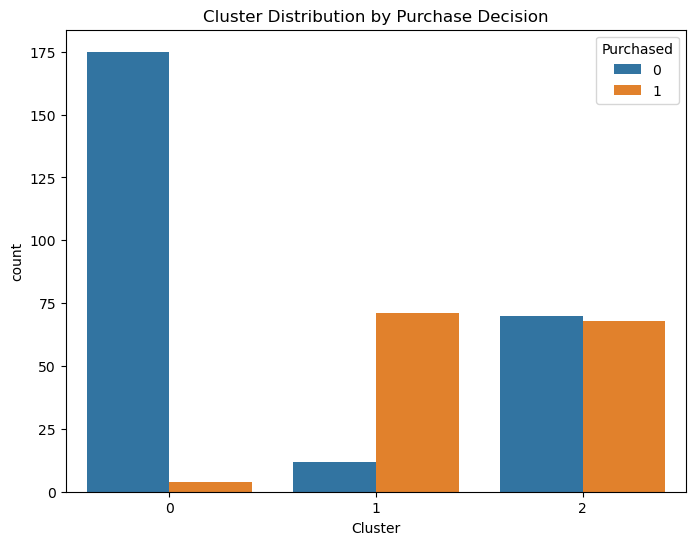

               Age  EstimatedSalary  Purchased
Cluster                                       
0        28.944134     56491.620112   0.022346
1        42.469880    121903.614458   0.855422
2        46.057971     55557.971014   0.492754


In [13]:
# Visualisera fördelningen av ålder och EstimatedSalary
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['EstimatedSalary'], kde=True)
plt.title('Distribution of Estimated Salary')

plt.show()

# Visualisera förhållandet mellan Age och EstimatedSalary med avseende på Purchased
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)
plt.title('Age vs Estimated Salary (Color by Purchased)')
plt.show()

# Förbereda data för klustring
X = df[['Age', 'EstimatedSalary']]

# Standardisera data för bättre prestanda i klustring
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means klustring
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisera kluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Cluster', data=df, palette='Set1')
plt.title('K-means Clustering (3 Clusters)')
plt.show()

# Analysera klustrens korrelation med Purchased
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', hue='Purchased', data=df)
plt.title('Cluster Distribution by Purchase Decision')
plt.show()

# Analysera medelvärden av numeriska variabler inom varje kluster
numeric_columns = ['Age', 'EstimatedSalary', 'Purchased']
print(df.groupby('Cluster')[numeric_columns].mean())

1. Beskrivning av datasetet
Dataset: age_salary.csv

Variabler:

User ID: Unikt identifieringsnummer för varje användare.
Gender: Kön på användaren (Male/Female).
Age: Användarens ålder i år.
EstimatedSalary: Användarens uppskattade årliga lön i lokal valuta.
Purchased: Binar variabel som indikerar om användaren har gjort ett köp (1) eller inte (0).
2. Exploratory Data Analysis (EDA)
Fördelning av variabler
Ålder: Medelåldern är 37,7 år, och fördelningen av ålder sträcker sig från 18 till 60 år. Det verkar finnas en spridning över hela arbetsåldern.
EstimatedSalary: Medellönen i datasetet är 69 742,50, med en standardavvikelse på cirka 34 097. Lönerna varierar från 15 000 till 150 000, vilket indikerar en stor variation i ekonomiska förhållanden bland användarna.
Könsfördelning: Detta dataset innehåller både manliga och kvinnliga användare, men kön är en kategorisk variabel och kräver specifik analys för att se om det finns skillnader i andra variabler baserat på kön.
Relationer mellan variabler
Korrelation mellan ålder och EstimatedSalary: Scatter plots kan användas för att undersöka om det finns något tydligt samband mellan ålder och lön. Inledningsvis verkar det som att det inte finns någon stark korrelation mellan dessa två variabler.
Köpbeslut (Purchased) mot andra variabler: Genom att titta på hur variablerna Ålder och EstimatedSalary relaterar till köpbeslutet (Purchased), kan vi försöka identifiera om det finns vissa ålders- eller lönegrupper som är mer benägna att göra ett köp.
3. Unsupervised Machine Learning
K-means clustering:

Syfte: Utföra klusteranalys för att se om det finns dolda grupper i data som kanske korrelerar med köpbeslutet (Purchased).
Val av kluster: Vi kan börja med att använda 3-4 kluster för att se hur användarna kan grupperas baserat på ålder och EstimatedSalary.
Resultat: Efter att ha kört K-means klustring kan vi undersöka om vissa kluster visar en högre frekvens av köpbeslut (Purchased = 1). Detta kan ge insikter i vilka demografiska grupper (baserat på ålder och inkomst) som är mest benägna att göra köp.
4. Presentation av resultat
Visualisering av EDA-resultat:
Scatter Plots: Visualisera fördelningen av ålder och EstimatedSalary i relation till köpbeslutet.
Box Plots: Undersök hur EstimatedSalary och Age varierar för de som har gjort ett köp (Purchased = 1) jämfört med de som inte har gjort ett köp.
Klusteranalysens resultat:
Kluster Visualisering: Scatter plot med klusterfärgning visar hur användarna grupperas. Vi kan också överlägga köpbeslutet för att se om vissa kluster har en högre andel köp.
5. Databerättelse
Denna analys visar hur vi kan identifiera potentiella kundsegment baserat på demografi och inkomstdata. Genom att använda K-means klustring kunde vi identifiera grupper av användare som har liknande ålder och EstimatedSalary. Resultaten antyder att vissa av dessa grupper har en högre sannolikhet att göra köp, vilket kan vara värdefullt för att rikta marknadsföring och erbjudanden.

Key Takeaways:
Segmentering: Kunde identifiera grupper med liknande ålder och EstimatedSalary. En av dessa grupper kan ha en högre sannolikhet att köpa, vilket gör dem till ett attraktivt mål för marknadsföringsinsatser.
Affärsstrategi: Genom att förstå vilka demografiska grupper som är mest benägna att göra köp kan företag optimera sina resurser genom att fokusera marknadsföring och kampanjer på dessa segment. Detta kan leda till högre konverteringsgrader och bättre avkastning på investeringar.
Affärsnytta: Denna typ av analys kan hjälpa företag att bättre förstå sina kundbaser, identifiera nya marknadsmöjligheter och förbättra precisionen i sina marknadsföringskampanjer, vilket slutligen kan leda till ökad försäljning och kundnöjdhet.